In [1]:
import pandas as pd
import numpy as np

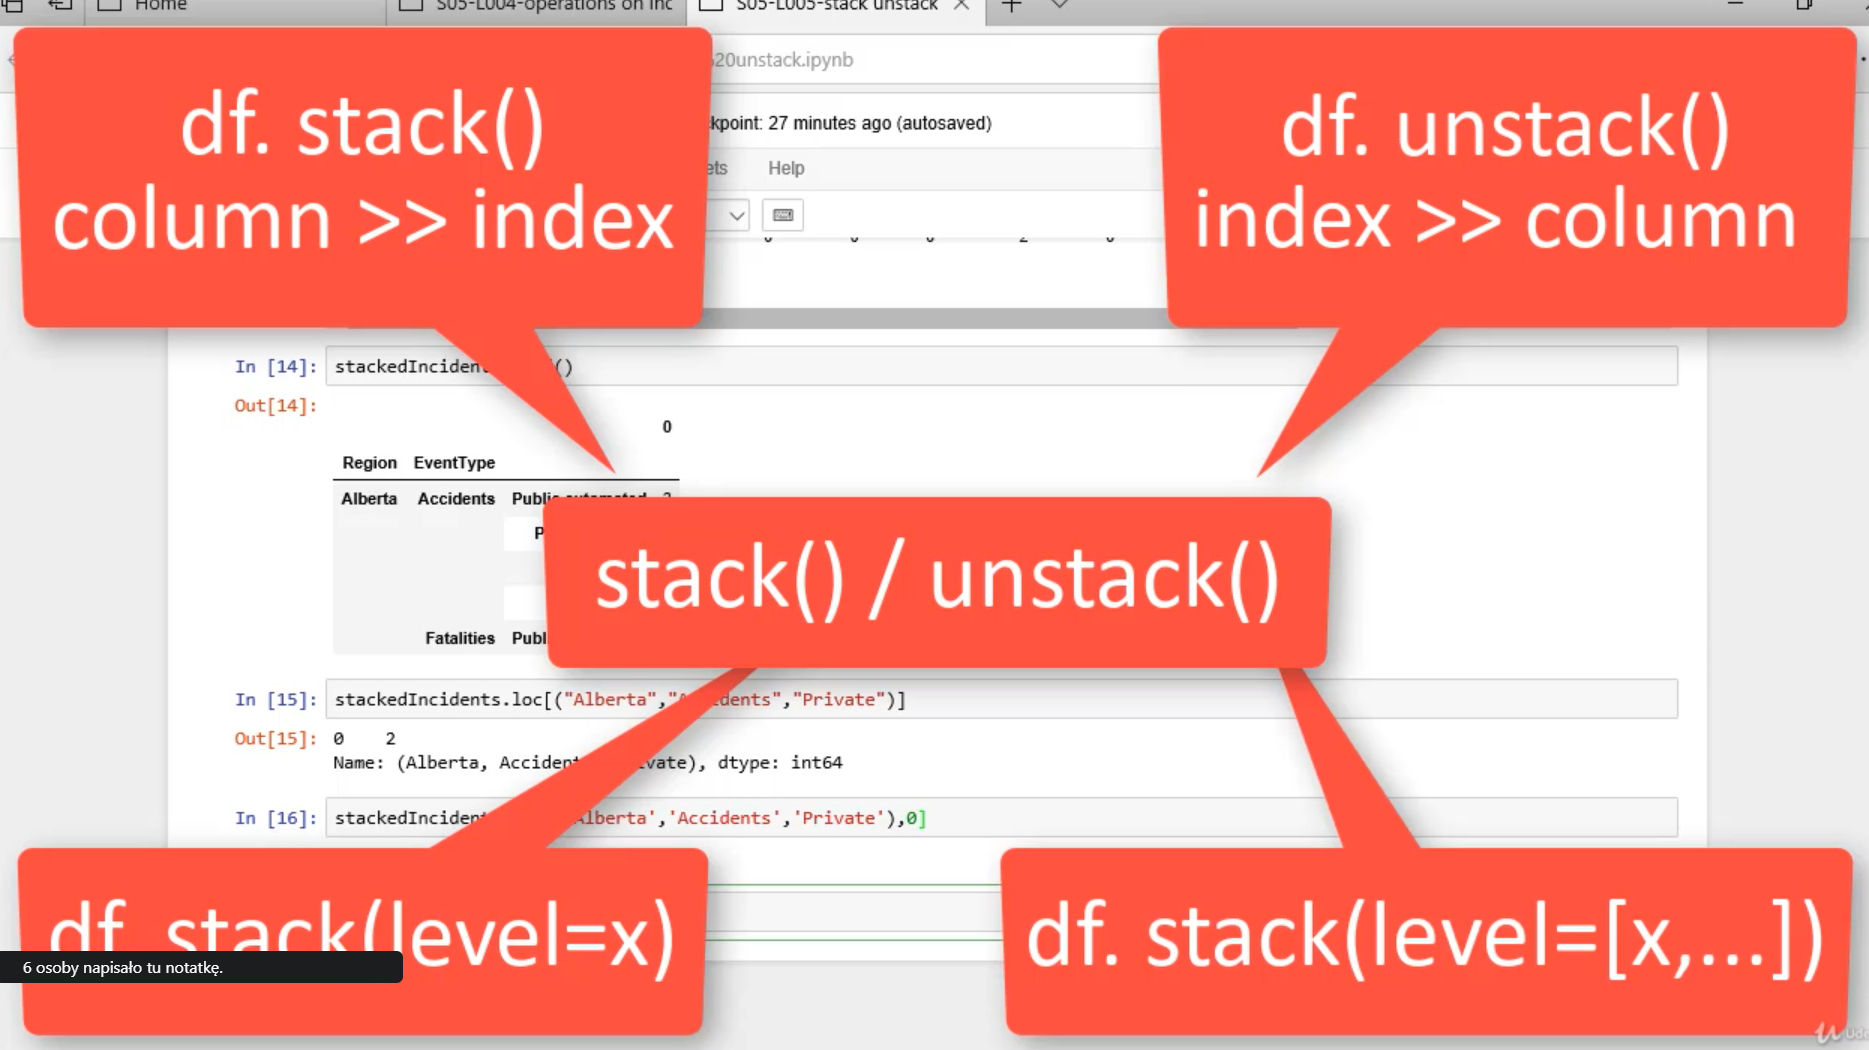

In [2]:
incidents = pd.read_csv('/content/Canadian Railway Crossing Incidents.csv')
incidents.set_index(['Region', 'EventType'],inplace=True)
incidents.sort_index(inplace=True)
incidents.head(10)

Public automated  ...  Farm
Region           EventType                           ...      
Alberta          Accidents                        3  ...     0
                 Fatalities                       0  ...     0
                 Serious injuries                 0  ...     0
British Columbia Accidents                        4  ...     0
                 Fatalities                       0  ...     0
                 Serious injuries                 3  ...     0
Manitoba         Accidents                        1  ...     2
                 Fatalities                       0  ...     0
                 Serious injuries                 0  ...     1
New Brunswick    Accidents                        0  ...     0

[10 rows x 4 columns]

Dodanie trzeciego poziomu indeksu czyli stack() to przeniesienie z kolumny do indeksu

In [3]:
incidents.stack().head()

Region   EventType                   
Alberta  Accidents   Public automated    3
                     Public passive      7
                     Private             2
                     Farm                0
         Fatalities  Public automated    0
dtype: int64

In [4]:
incidents.stack().to_frame().head()

0
Region  EventType                     
Alberta Accidents  Public automated  3
                   Public passive    7
                   Private           2
                   Farm              0
        Fatalities Public automated  0

Przywrócenie najgłębszego indeksu do kolumn

In [6]:
stackedIncidents = incidents.stack().to_frame()

In [7]:
stackedIncidents.head()

0
Region  EventType                     
Alberta Accidents  Public automated  3
                   Public passive    7
                   Private           2
                   Farm              0
        Fatalities Public automated  0

In [8]:
stackedIncidents.unstack().head()

0                            
                                  Public automated Public passive Private Farm
Region           EventType                                                    
Alberta          Accidents                       3              7       2    0
                 Fatalities                      0              0       0    0
                 Serious injuries                0              1       2    0
British Columbia Accidents                       4              1       0    0
                 Fatalities                      0              0       0    0

In [9]:
stackedIncidents.unstack().unstack().head()

0             ...                            
                 Public automated             ...       Farm                 
EventType               Accidents Fatalities  ... Fatalities Serious injuries
Region                                        ...                            
Alberta                         3          0  ...          0                0
British Columbia                4          0  ...          0                0
Manitoba                        1          0  ...          0                1
New Brunswick                   0          0  ...          0                0
Newfoundland                    0          0  ...          0                0

[5 rows x 12 columns]

In [10]:
stackedIncidents.unstack(0).head()

0                   ...                    
Region                      Alberta British Columbia  ... Quebec Saskatchewan
EventType                                             ...                    
Accidents  Public automated       3                4  ...      4            1
           Public passive         7                1  ...      0            3
           Private                2                0  ...      1            0
           Farm                   0                0  ...      0            0
Fatalities Public automated       0                0  ...      1            0

[5 rows x 10 columns]

In [11]:
stackedIncidents.unstack(level = 'Region').head()

0                   ...                    
Region                      Alberta British Columbia  ... Quebec Saskatchewan
EventType                                             ...                    
Accidents  Public automated       3                4  ...      4            1
           Public passive         7                1  ...      0            3
           Private                2                0  ...      1            0
           Farm                   0                0  ...      0            0
Fatalities Public automated       0                0  ...      1            0

[5 rows x 10 columns]

In [12]:
stackedIncidents.head()

0
Region  EventType                     
Alberta Accidents  Public automated  3
                   Public passive    7
                   Private           2
                   Farm              0
        Fatalities Public automated  0

In [13]:
stackedIncidents.unstack(level=['Region','EventType']).head()

0             ...                              
Region             Alberta             ... Saskatchewan                 
EventType        Accidents Fatalities  ...   Fatalities Serious injuries
Public automated         3          0  ...            0                0
Public passive           7          0  ...            0                0
Private                  2          0  ...            0                0
Farm                     0          0  ...            0                0

[4 rows x 30 columns]

In [14]:
stackedIncidents.head()

0
Region  EventType                     
Alberta Accidents  Public automated  3
                   Public passive    7
                   Private           2
                   Farm              0
        Fatalities Public automated  0

In [15]:
stackedIncidents.loc[('Alberta','Accidents','Private')]

0    2
Name: (Alberta, Accidents, Private), dtype: int64

In [16]:
stackedIncidents.loc[('Alberta','Accidents','Private'),0]

2